In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('../data/dulieuxettuyendaihoc.csv', header=0,delimiter=',',encoding='utf-8')
df

,MSSV,GT,DT,KV,M1,M2,M3,KT,NGAYTHI,DINHHUONGNGHENGHIEP
0,SV001,F,NaN,2NT,3.25,3.25,4.50,A1,12/7/2018,No
1,SV002,M,NaN,1,6.00,4.00,3.50,C,12/7/2018,Yes
2,SV003,M,NaN,1,5.00,6.75,4.00,C,12/7/2018,No
3,SV004,M,NaN,1,4.25,4.25,5.25,D1,12/7/2018,No
4,SV005,M,NaN,2NT,4.25,4.50,5.00,A,12/7/2018,No
...,...,...,...,...,...,...,...,...,...,...
95,SV0096,F,NaN,1,5.25,1.50,6.25,C,7/20/2022,Yes
96,SV0097,F,NaN,1,5.25,3.75,4.75,C,7/20/2022,No
97,SV0098,M,NaN,2NT,7.00,8.00,4.00,C,7/20/2022,Yes
98,SV0099,M,NaN,1,5.00,3.50,5.50,C,7/20/2022,No


In [5]:
df = df[['GT','DT','KV','KT','M1',
         'M2','M3',
         'NGAYTHI','DINHHUONGNGHENGHIEP']]
df

,GT,DT,KV,KT,M1,M2,M3,NGAYTHI,DINHHUONGNGHENGHIEP
0,F,NaN,2NT,A1,3.25,3.25,4.50,12/7/2018,No
1,M,NaN,1,C,6.00,4.00,3.50,12/7/2018,Yes
2,M,NaN,1,C,5.00,6.75,4.00,12/7/2018,No
3,M,NaN,1,D1,4.25,4.25,5.25,12/7/2018,No
4,M,NaN,2NT,A,4.25,4.50,5.00,12/7/2018,No
...,...,...,...,...,...,...,...,...,...
95,F,NaN,1,C,5.25,1.50,6.25,7/20/2022,Yes
96,F,NaN,1,C,5.25,3.75,4.75,7/20/2022,No
97,M,NaN,2NT,C,7.00,8.00,4.00,7/20/2022,Yes
98,M,NaN,1,C,5.00,3.50,5.50,7/20/2022,No


In [6]:
df.rename(columns={'NGAYTHI':'NT',
                   'DINHHUONGNGHENGHIEP':'NGHE'}, 
                   inplace=True)

In [8]:
df.dropna(how='all', inplace=True)
df.drop_duplicates(inplace=True)

In [10]:
import seaborn as sns

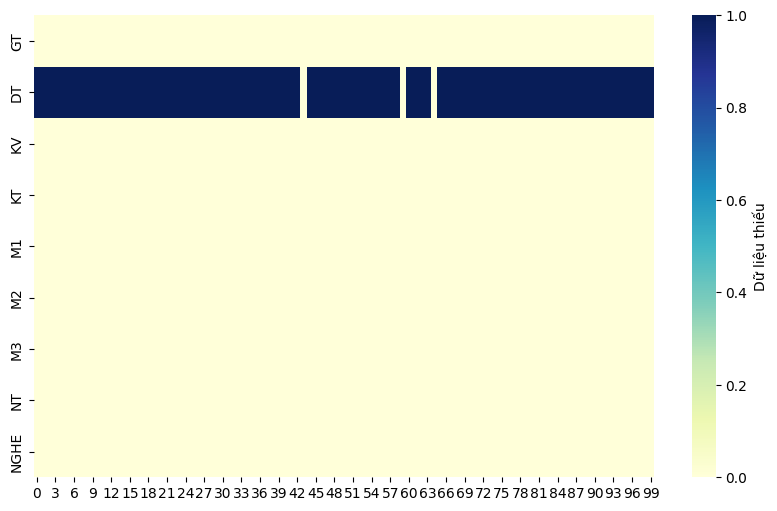

In [11]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose(),cmap='YlGnBu',
            cbar_kws={'label':'Dữ liệu thiếu'})
plt.savefig('missingdata.png', dpi=100)
plt.show()

In [12]:
df['DT'].fillna('KINH', inplace=True)
df['M1'].fillna(df['M1'].mean(), inplace=True)
df['M2'].fillna(df['M2'].median(), inplace=True)
df['M3'].fillna(0, inplace=True)

C:\Users\LOAN\AppData\Local\Temp\ipykernel_16112\1825428651.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['DT'].fillna('KINH', inplace=True)
C:\Users\LOAN\AppData\Local\Temp\ipykernel_16112\1825428651.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'KINH' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['DT'].fillna('KINH', inplace=True)
C:\Users\LOAN\AppData\Local\Temp\ipykernel_16112\182

In [14]:
df['TBM'] = (df['M1']+df['M2']+df['M3'])/3
df
df.loc[df['TBM'] < 5.0, 'XL'] = 'FAIL'

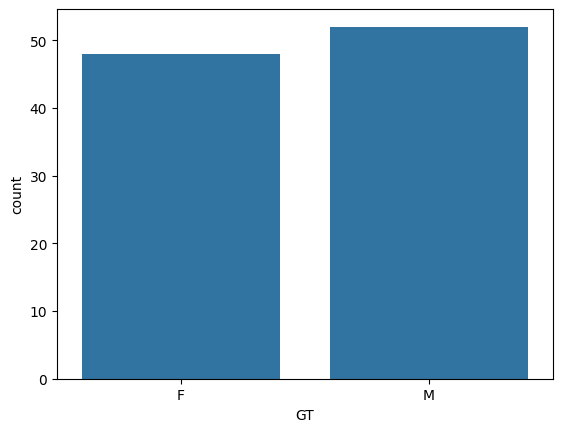

In [15]:

sns.countplot(x='GT', data=df)
plt.show()

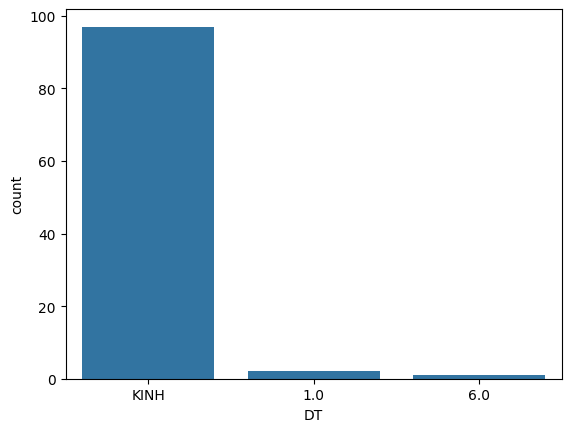

In [16]:
# Sinh viên tự làm tương tự cho các cột DT
# --> Dựa trên biểu đồ DT cho biết tại sao 
#     ta không phân tích theo phân nhóm DT
# --> Đưa ra kết luận
 
sns.countplot(x='DT', data=df)
plt.show()

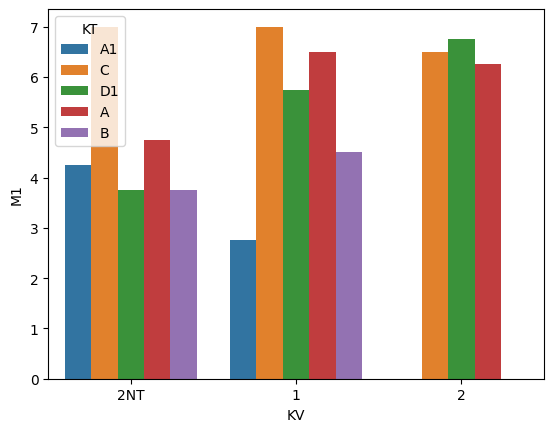

In [18]:
sns.barplot(x='KV', y='M1', hue='KT', 
           data=df, errorbar=None, estimator=np.max)
plt.show()

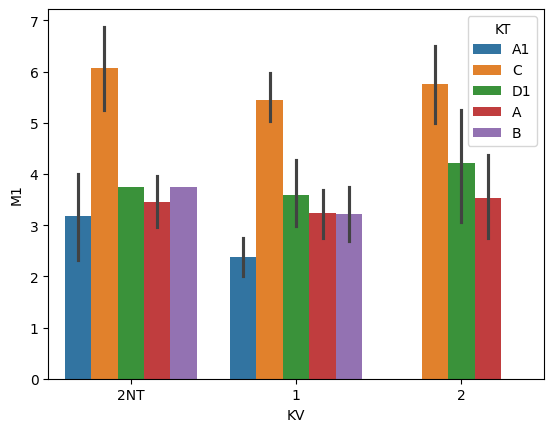

In [19]:
sns.barplot(x='KV', y='M1', hue='KT', 
           data=df)
plt.show()

In [20]:
colors = sns.color_palette('pastel') # Tạo bảng màu

In [22]:
gb = df.groupby(['KV'])['PLUS'].agg(['sum'])

labels = gb.index
data = list(gb['sum'])

KeyError: 'Column not found: PLUS'

In [21]:
plt.pie(data, labels=labels, colors=colors, 
        autopct='%1.1f%%', shadow=True)

NameError: name 'data' is not defined